<div dir = 'rtl'>

## تکلیف
 به دست آوردن توزیع $\chi^2$

تکلیف برازش


## هدف
در این تکلیف، شما با استفاده از تولید اعداد تصادفی و برازش یک تابع گاوسی (نرمال) بر روی داده‌ها، توزیع کای-دو (χ²) را بررسی خواهید کرد. هدف این است که ببینید توزیع مقادیر کمینه‌ی χ² چه شکلی دارد و چگونه به توزیع کای-دو مرتبط می‌شود.

## مراحل انجام کار

### ۱. تولید داده‌های تصادفی
1. یک تابع گاوسی با پارامترهای زیر تعریف کنید:
   - میانگین ($ \mu $): ۰
   - انحراف معیار ($ \sigma $): ۱
   - دامنه $ x $: از -۵ تا ۵ با گام‌های ۰٫۱

2. برای هر نقطه $ x $، مقدار تابع گاوسی را محاسبه کنید و به آن نویز گاوسی با انحراف معیار ۰٫۱ اضافه کنید. این داده‌های نویزی را به عنوان داده‌های آزمایشی در نظر بگیرید.

### ۲. برازش تابع گاوسی
1. تابع گاوسی زیر را برای برازش روی داده‌ها تعریف کنید:

   $$
   f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
   $$

2. با استفاده از روش کمترین مربعات (Least Squares)، پارامترهای $ \mu $ و $ \sigma $ را به گونه‌ای پیدا کنید که تابع گاوسی بهترین برازش را به داده‌های نویزی داشته باشد. مقدار χ² را برای این برازش محاسبه کنید.

### ۳. تکرار آزمایش
1. آزمایش بالا را ۱۰۰۰ بار تکرار کنید. در هر تکرار:
   - داده‌های نویزی جدید تولید کنید.
   - تابع گاوسی را برازش کنید.
   - مقدار χ² را محاسبه و ذخیره کنید.
   - ماتریس `covariance` را نیز در هر مرحله ذخیره کنید.

### ۴. تحلیل نتایج
1. هیستوگرام مقادیر χ² را رسم کنید.
2. توزیع کای-دو نظری با درجات آزادی مناسب را روی هیستوگرام رسم کنید و با توزیع تجربی مقایسه کنید.
3. میانگین و واریانس مقادیر χ² را محاسبه و با مقادیر نظری توزیع کای-دو مقایسه کنید.
4. توزیع مقادیر موجود در ماتریس `covariance` را رسم کنید. چه نتیجه ای می‌توانید از آن بگیرید؟

## سوالات

1. **هیستوگرام χ²:**  
   هیستوگرام مقادیر χ² را رسم کنید. آیا شکل آن شبیه به توزیع کای-دو است؟ چرا؟

2. **درجات آزادی:**  
   با توجه به تعداد پارامترهای برازش‌شده ($ \mu $ و $ \sigma $)، درجات آزادی توزیع کای-دو را محاسبه کنید. آیا این درجات آزادی با شکل هیستوگرام مطابقت دارد؟

3. **میانگین و واریانس:**  
   میانگین و واریانس مقادیر χ² را محاسبه کنید. آیا این مقادیر با مقادیر نظری توزیع کای-دو ($ \text{average} = k $ و $ \text{variance} = 2k $) مطابقت دارند؟

4. **تأثیر نویز:**  
   اگر انحراف معیار نویز را تغییر دهید (مثلاً به ۰٫۲ افزایش دهید)، چه تغییری در توزیع χ² مشاهده می‌کنید؟ آیا این تغییر با تئوری همخوانی دارد؟

5. **برازش توزیع کای-دو:**  
   با استفاده از روش‌های برازش، توزیع کای-دو نظری را به هیستوگرام مقادیر χ² برازش دهید. پارامترهای برازش‌شده چقدر با مقادیر نظری تفاوت دارند؟

+++
## نکات
- از کتابخانه‌های علمی مانند `numpy`، `scipy` و `matplotlib` در پایتون استفاده کنید.
- برای برازش تابع گاوسی می‌توانید از تابع `curve_fit` در `scipy.optimize` استفاده کنید.
- برای رسم توزیع کای-دو نظری از تابع `chi2.pdf` در `scipy.stats` استفاده کنید.

</div>

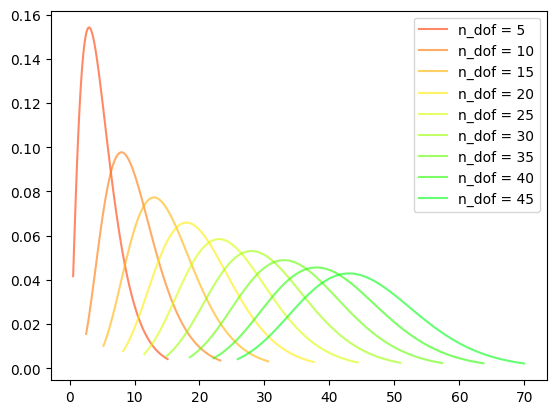

In [ ]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

for df in range(5 , 50 , 5):
    x = np.linspace(chi2.ppf(0.01, df),
                    chi2.ppf(0.99, df), 100)
    ax.plot(x, chi2.pdf(x, df),
        color=plt.colormaps['hsv'](df*2) , alpha=0.6, label=f'n_dof = {df}')
    
plt.legend()
plt.show()